[link text](https://)**To Import Required Libraries**

**Amazon Sales Dataset Analysis** *italicized text*
----------------

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
import seaborn as sb

In [ ]:
from textblob import TextBlob

**To Import & Clean The Dataset**

In [ ]:
df= pd.read_csv('D:\\New folder\\Amazon.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [ ]:
df.head(3)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,₹507,"₹1,208",58%,4.1,"8,131",Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/I/31+NwZ8gb1...,https://www.amazon.in/D-Link-DWA-131-Wireless-...
1,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,₹507,"₹1,208",58%,4.1,"8,131",Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/D-Link-DWA-131-Wireless-...
2,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,₹749,"₹1,339",44%,4.2,"1,79,692",150 Mbps Wi-Fi —— Exceptional wireless speed u...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,https://m.media-amazon.com/images/I/31Wb+A3VVd...,https://www.amazon.in/TP-Link-TL-WN722N-150Mbp...


In [ ]:
# To remove coma & '₹' from column
df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '')

In [ ]:
# To remove coma & '₹' from column
df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '')

In [ ]:
# To remove '%' from column
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '')

In [ ]:
# To remove coma from column
df['rating_count'] = df['rating_count'].str.replace(',', '')

In [ ]:
# Convert columns to numeric
columns_to_convert = ['discounted_price', 'actual_price', 'discount_percentage', 'rating','rating_count']

for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   int64  
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [ ]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1464.000000,1463.000000
mean,3125.310874,5444.990635,47.691468,4.096585,18295.541353
std,6944.304394,10874.826864,21.635905,0.291674,42753.864952
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,32.000000,4.000000,1186.000000
50%,799.000000,1650.000000,50.000000,4.100000,5179.000000
75%,1999.000000,4295.000000,63.000000,4.300000,17336.500000
max,77990.000000,139900.000000,94.000000,5.000000,426973.000000


__________________________

**1. How does the discount percentage affect the rating of a product?**


In [ ]:
# To create bins as interval
intervals = range(0, df['discount_percentage'].max() + 10, 10)
# To group by and cut the data in specified intervals
df1=pd.DataFrame(df.groupby(pd.cut(df['discount_percentage'], bins=intervals))['rating'].mean())

C:\Users\SWAPNIL\AppData\Local\Temp\ipykernel_6112\2578838657.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1=pd.DataFrame(df.groupby(pd.cut(df['discount_percentage'], bins=intervals))['rating'].mean())


In [ ]:
df1

,rating
discount_percentage,
"(0, 10]",4.160000
"(10, 20]",4.142105
"(20, 30]",4.153659
"(30, 40]",4.100575
"(40, 50]",4.095635
"(50, 60]",4.063281
"(60, 70]",4.110000
"(70, 80]",4.029375
"(80, 90]",3.949057


Text(0.5, 1.0, 'Discount_percentage Wise Ratings')

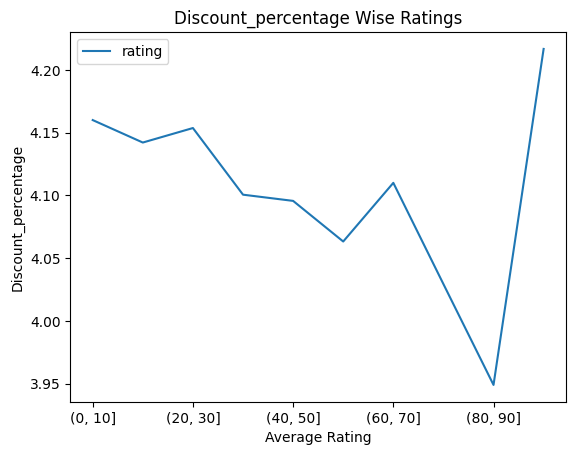

In [ ]:
# To Plot the data
df1.plot()
# Set labels and title
plt.xlabel('Average Rating')
plt.ylabel('Discount_percentage')
plt.title('Discount_percentage Wise Ratings')

**Discount Analysis:**

The discount percentage does not appear to have a significant impact on the rating of a product, as the ratings remain fairly consistent across different discount percentage ranges.

________________________________________________________________________________________________________________________________

**2. Which category has the highest average rating?**

In [ ]:
# To split catagory & create new column
df['New_Cat']= df['category'].str.split('|').str.get(0)

In [ ]:
# To Calculate catagory wise average rating
df2=pd.DataFrame(df.groupby('New_Cat')['rating'].mean().sort_values(ascending=False))

In [ ]:
df2

,rating
New_Cat,
OfficeProducts,4.309677
Toys&Games,4.300000
HomeImprovement,4.250000
Computers&Accessories,4.154967
Electronics,4.081749
Home&Kitchen,4.040716
Health&PersonalCare,4.000000
MusicalInstruments,3.900000
Car&Motorbike,3.800000


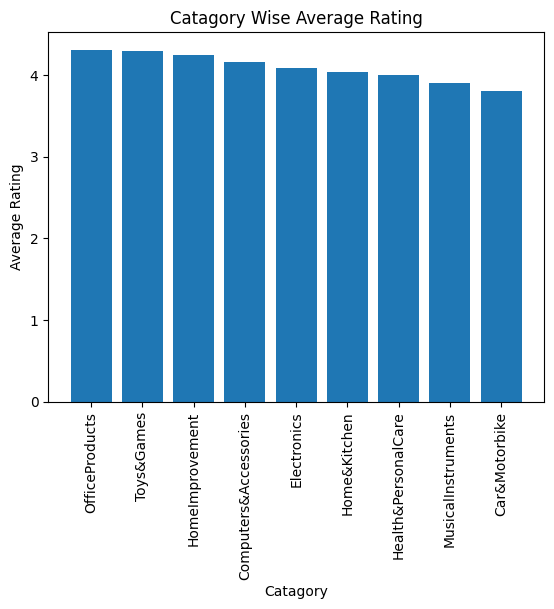

In [ ]:
# To plot bar chart
plt.bar(df2.index, df2['rating'])
plt.title('Catagory Wise Average Rating')
plt.xlabel('Catagory')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

**Category Analysis:**

The "OfficeProducts" category has the highest average rating among all categories, suggesting that products in this category tend to receive better ratings on average.

_______________________________________________________________________________________________________________________

**3. Is there a correlation between the product's price and its rating?**

In [ ]:
# Calculate the Pearson correlation coefficient using numpy
pearson_corr = np.corrcoef(df['actual_price'], df['rating'])[0, 1]

# Print the Pearson correlation coefficient
print(f"Pearson Correlation Coefficient: {pearson_corr}")

Pearson Correlation Coefficient: nan


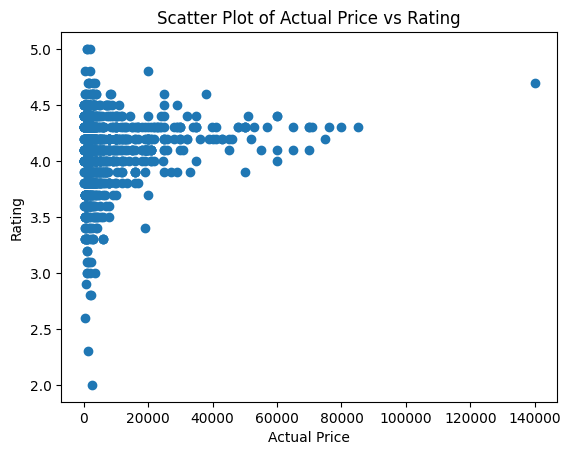

In [ ]:
# Plot a scatter plot to visualize the relationship
plt.scatter(df['actual_price'], df['rating'])
plt.xlabel('Actual Price')
plt.ylabel('Rating')
plt.title('Scatter Plot of Actual Price vs Rating')
plt.show()

**Price Analysis:**

There is no clear correlation between a product's price and its rating, indicating that consumers' ratings are not strongly influenced by the product's price.

__________

**4. What is the most common word in the positive and negative reviews?**

In [ ]:
sentiments = []

for row in df['review_content']:
    blob = TextBlob(str(row))
    sentiment = blob.sentiment.polarity
    sentiments.append(sentiment)

# Create a new column in the DataFrame to store the sentiments
df.loc[:, 'sentiments'] = sentiments

In [ ]:
# Function to analyze sentiment using TextBlob
def analyze_sentiment(Num):
    # Classify sentiment as positive, negative, or neutral
    if Num > 0:
        return 'Positive'
    elif Num < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the 'sentiments' column
df['sentiment_category'] = df['sentiments'].apply(analyze_sentiment)

In [ ]:
df.sample(4)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,New_Cat,sentiments,sentiment_category
209,B01M5967SY,TIZUM High Speed HDMI Cable Aura -Gold Plated-...,"Electronics|HomeTheater,TV&Video|Accessories|C...",379.0,999.0,62,4.2,12153.0,Latest standard HDMI A Male to A Male Cable: S...,"AGVUE2NFN2MQEOQ4PR525B2ZI5PQ,AFO4M4BQ2WS7A3LPK...","Yashpreet Singh,Abiram,Aakaash Ramchandani,Ami...","R2DIHMHOPYEASB,R24RHE9B30YXWQ,R3DYXQZQA6PPHM,R...",Cheap product and same is the performance but ...,The signal is too unstable once connect you ne...,https://m.media-amazon.com/images/I/51aZN040TH...,https://www.amazon.in/Tizum-10-2Gbps-Speed-Pla...,Electronics,0.206422,Positive
1130,B09SDDQQKP,INALSA Vaccum Cleaner Handheld 800W High Power...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",1799.0,3295.0,45,3.8,687.0,POWERFUL CYCLONIC SUCTION: Dura Clean utilizes...,"AE4L3MBEACOHT7Y7GGWQ72DUJ6SA,AELHNY42N2WPTZN5R...","prem chand,Avishek Saha Chowdhury,Tanvi Chadha...","RHK81ZNE4PTND,R1APOT5W7NCQ0K,R2TC26RQAISV2N,R2...","Good for now,Worth Buying For Daily Cleaning,V...","Device was sturdy and handy, suction power is ...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Handheld-Powerful-Filtra...,Home&Kitchen,0.245814,Positive
328,B07G3YNLJB,Crucial BX500 240GB 3D NAND SATA 6.35 cm (2.5-...,Computers&Accessories|Components|InternalSolid...,1815.0,3100.0,41,4.5,92925.0,"240GB 2.5-inch internal SSD, SATA 6.0Gb/s, wit...","AGHW3JDEF6JIRC4HB43UDMKOFXZQ,AF4N3Q6OEXVBSAHPK...","Shaikh Faisal,SISODIYA NANUBHAI,Aaryan Jagtap,...","R34WAR6NQSVZBI,RGG00MCOD3B6A,R2RO4Z1CBF2G1I,R1...","Absolutely worth the price,Best product on low...",After I changed from my slow 500gb HDD to this...,https://m.media-amazon.com/images/I/31foPNxmws...,https://www.amazon.in/Crucial-BX500-240GB-2-5-...,Computers&Accessories,0.227415,Positive
517,B07YZG8PPY,TATA SKY HD Connection with 1 month basic pack...,"Electronics|HomeTheater,TV&Video|SatelliteEqui...",1249.0,2299.0,46,4.3,7636.0,Enjoy the high definition experience with 1080...,"AFYPWMPR6XXQPAOLMGPWOW6HULQA,AFQTWROEABNVTNGTK...","Lokesh bhandari,Ajit Singh,Kottiswaran,Santa S...","R1HC3ZLVI3VC2L,RROY3V4G9AN02,R3DVFUQOK3JXZ7,R3...","Very good product,All items is really good,val...",https://m.media-amazon.com/images/I/61T7yiKCRX...,https://m.media-amazon.com/images/I/31J3pwT7i4...,https://www.amazon.in/TATASKY-Connection-Month...,Electronics,0.186122,Positive


In [ ]:
df5=pd.DataFrame(df['sentiment_category'].value_counts())

In [ ]:
df5

,count
sentiment_category,
Positive,1438
Negative,26
Neutral,1


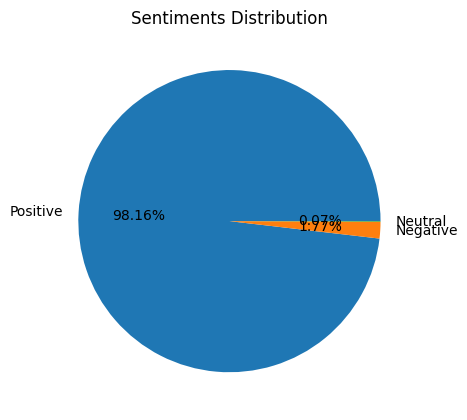

In [ ]:
# Plotting the pie chart
plt.figure(figsize=(5,5))
plt.pie(df5['count'],labels=df5.index,autopct='%1.2f%%',textprops={'fontsize':10})
# Add a title
plt.title('Sentiments Distribution')

# Adjust layout to avoid label overlap
plt.tight_layout(pad =2)

# Display the plot
plt.show()

**Review Analysis:**

The majority of reviews in the dataset are positive, with approximately 98% of reviews falling into this category. This suggests that customers generally have a positive sentiment when reviewing products.

________

**5. What is the distribution of ratings across all products?**

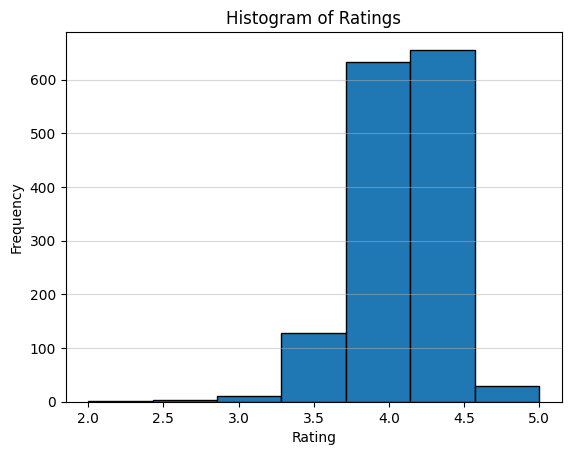

In [ ]:
# Plot a histogram of the 'rating' column
plt.hist(df['rating'], bins=7, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')
plt.grid(axis='y', alpha=0.5)
plt.show()

**Rating Analysis:**

The distribution of ratings across all products indicates that most products receive ratings between 4 to 4.5, suggesting that customers tend to provide moderately positive feedback.

____

**6. Which product has the highest number of reviews and what is its rating?**

In [ ]:
# To groupby product_id & rating with count of review_id
df6 = df.groupby('product_id').agg({'rating': 'first', 'review_id': 'count'}).sort_values(by='review_id', ascending=False)

In [ ]:
# To sort highest reviewed products by highest rating
df6[df6['review_id'] > 2].sort_values(by='rating', ascending=False).head(10)

,rating,review_id
product_id,,
B09C6HXFC1,4.5,3
B07XLCFSSN,4.4,3
B083342NKJ,4.4,3
B09W5XR9RT,4.4,3
B077Z65HSD,4.3,3
B08CF3D7QR,4.3,3
B082T6V3DT,4.3,3
B08DDRGWTJ,4.3,3
B01GGKYKQM,4.3,3


**Product Analysis:**

The products with the highest number of reviews (3 reviews) have ratings ranging from 4.2 to 4.5. This suggests that products with more reviews tend to have ratings in the higher range.

____

**7. Identify the top 5 users who have given the most reviews?**

In [ ]:
# To groupby user_name with user_id count
df7=pd.DataFrame(df.groupby('user_name')['user_id'].count().sort_values(ascending=False).head(5))

In [ ]:
df7

,user_id
user_name,
"$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger Planet,Justice ⚖️,indrajyoti d.,Aditya Kumar,E.C.GEORGE",10
"Satheesh Kadiam,Pritom Chakraborty,Vishwa,Simranpreet Singh,Saptarshi,Amazon Customer,D.RAGHUL,Dharmendra kumar",8
"Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jaspreet singh,Khaja moin,Anand,S.ARUMUGAM",8
"Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh chouhan,Ravi Siddan,Himanshu Goel,Udaykumar",7
"ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Placeholder,BharanI,sonia,Niam",7


**User Analysis:**

The top 5 users who have given the most reviews have contributed significantly to the dataset. The highest number of reviews given by a single user is 10.

_____

**8. Is there a correlation between the length of a review and the rating given?**

In [ ]:
# Calculate the length of the reviews (e.g., number of characters)
df['review_length'] = df['review_content'].apply(len)

# Calculate the Pearson correlation coefficient using numpy
pearson_corr = np.corrcoef(df['review_length'], df['rating'])[0, 1]

# Print the Pearson correlation coefficient
print(f"Pearson Correlation Coefficient: {pearson_corr}")

Pearson Correlation Coefficient: nan


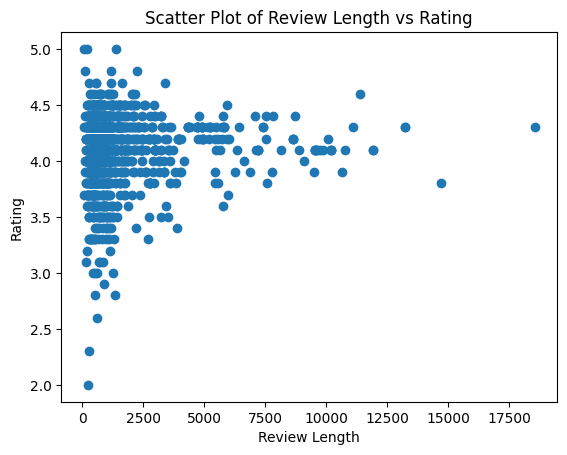

In [ ]:
# Plot a scatter plot to visualize the relationship
plt.scatter(df['review_length'], df['rating'])
plt.xlabel('Review Length')
plt.ylabel('Rating')
plt.title('Scatter Plot of Review Length vs Rating')
plt.show()

**Review Length Analysis:**

There is no correlation between the length of a review and the rating given by users. The length of a review does not appear to influence the rating.

_____

**9. Does having an image link affect the product rating?**

In [ ]:
# Function to determine if a product has an image link
def has_image_link(link):
    if pd.notna(link):
        return True
    else:
        return False

# Create a new column 'has_image_link' based on the 'product_link' column
df['has_image_link'] = df['product_link'].apply(has_image_link)

# Calculate the average ratings for products with and without image links
average_rating_with_image = df[df['has_image_link']]['rating'].mean()
average_rating_without_image = df[~df['has_image_link']]['rating'].mean()

# Print the average ratings
print(f"Average rating for products with image links: {average_rating_with_image}")
print(f"Average rating for products without image links: {average_rating_without_image}")

Average rating for products with image links: 4.096584699453552
Average rating for products without image links: nan


**Image Analysis:**

Products with image links tend to have an average rating of 4.0965, but it's important to note that no products with no image links were found in the dataset. Therefore, it's inconclusive whether the presence of an image link affects the product rating.

____

**10. Can the length of the product description be correlated to the product's rating?**

In [ ]:
#Calculate the length of the product descriptions
df['product_description_length'] = df['about_product'].apply(len)

# Calculate the Pearson correlation coefficient using numpy
pearson_corr = np.corrcoef(df['product_description_length'], df['rating'])[0, 1]

# Print the Pearson correlation coefficient
print(f"Pearson Correlation Coefficient: {pearson_corr}")

Pearson Correlation Coefficient: nan


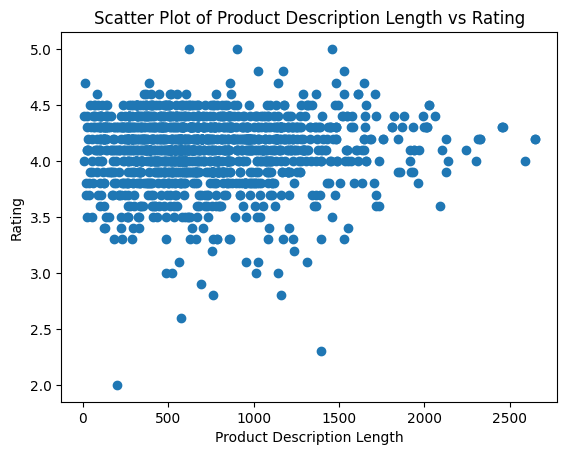

In [ ]:
# Plot a scatter plot to visualize the relationship
plt.scatter(df['product_description_length'], df['rating'])
plt.xlabel('Product Description Length')
plt.ylabel('Rating')
plt.title('Scatter Plot of Product Description Length vs Rating')
plt.show()

**Product Description Analysis:**

The length of the product description does not appear to be correlated with the product's rating. This suggests that the length of the product description may not be a significant factor in determining customer ratings.

_____

**Summary**

In summary, the dataset analysis reveals that factors like discount percentage, price, and product description length do not strongly influence product ratings. Positive reviews are predominant, and the category "OfficeProducts" tends to have products with higher average ratings. Overall, the dataset provides valuable insights into customer reviews and product ratings, but more specific factors affecting ratings may require further investigation.